# Demo for paper "First Order Motion Model for Image Animation"

**Add folder https://drive.google.com/drive/folders/1kZ1gCnpfU0BnpdU47pLM_TQ6RypDDqgw?usp=sharing  to your google drive.
Alternativelly you can use this mirror link https://drive.google.com/drive/folders/16inDpBRPT1UC0YMGMX3dKvRnOUsf5Dhn?usp=sharing**

In [77]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from PIL import Image
import os

In [107]:
train_dir = 'data/kth/128x128/train/'
trainfiles = [train_dir + f for f in os.listdir(train_dir)]
trainfiles.sort()
trainfiles

['data/kth/128x128/train/person01_boxing_d1_uncomp.mp4',
 'data/kth/128x128/train/person01_boxing_d2_uncomp.mp4',
 'data/kth/128x128/train/person01_boxing_d3_uncomp.mp4',
 'data/kth/128x128/train/person01_boxing_d4_uncomp.mp4',
 'data/kth/128x128/train/person01_handclapping_d1_uncomp.mp4',
 'data/kth/128x128/train/person01_handclapping_d2_uncomp.mp4',
 'data/kth/128x128/train/person01_handclapping_d3_uncomp.mp4',
 'data/kth/128x128/train/person01_handclapping_d4_uncomp.mp4',
 'data/kth/128x128/train/person01_handwaving_d1_uncomp.mp4',
 'data/kth/128x128/train/person01_handwaving_d2_uncomp.mp4',
 'data/kth/128x128/train/person01_handwaving_d3_uncomp.mp4',
 'data/kth/128x128/train/person01_handwaving_d4_uncomp.mp4',
 'data/kth/128x128/train/person01_jogging_d1_uncomp.mp4',
 'data/kth/128x128/train/person01_jogging_d2_uncomp.mp4',
 'data/kth/128x128/train/person01_jogging_d3_uncomp.mp4',
 'data/kth/128x128/train/person01_jogging_d4_uncomp.mp4',
 'data/kth/128x128/train/person01_running_d1

In [114]:
test_dir = 'data/kth/128x128/test1/'
testfiles = [test_dir + f for f in os.listdir(test_dir)]
testfiles.sort()
testfiles

['data/kth/128x128/test1/person25_boxing_d1_uncomp00.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp01.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp02.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp03.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp04.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp05.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp06.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp07.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp08.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp09.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp10.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp11.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp12.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp13.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp14.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp15.mp4',
 'data/kth/128x128/test1/person25_boxing_d1_uncomp16.mp4

In [32]:
import torch
from demo import load_checkpoints, detect
generator, kp_detector = load_checkpoints(config_path='config/kth-128.yaml', 
                            checkpoint_path='demo/kth.pth.tar')

In [33]:
def ito1(image):
    return image[..., 0:1]
def ito3(image):
    return np.concatenate((image, image, image), -1)
def vto1(video):
    return [ito1(frame) for frame in video]
def vto3(video):
    return [ito3(frame) for frame in video]

def read_video(path):
    reader = imageio.get_reader(path)

    fps = reader.get_meta_data()['fps']
    driving_video = []
    try:
        for im in reader:
            driving_video.append(im)
    except RuntimeError:
        pass
    reader.close()
    
    return fps, [resize(frame, (128, 128))[..., :3] for frame in driving_video]

In [ ]:
values, jacobians = [], []

for f in tqdm(trainfiles):
    fps, video = read_video(f)
    value, jacobian = detect(vto1(video), kp_detector)
    values.append(value.cpu())
    jacobians.append(jacobian.cpu())

In [102]:
trainfiles

['data/kth/128x128/train/person01_boxing_d1_uncomp.mp4',
 'data/kth/128x128/train/person01_boxing_d2_uncomp.mp4',
 'data/kth/128x128/train/person01_boxing_d3_uncomp.mp4',
 'data/kth/128x128/train/person01_boxing_d4_uncomp.mp4',
 'data/kth/128x128/train/person02_boxing_d1_uncomp.mp4',
 'data/kth/128x128/train/person02_boxing_d2_uncomp.mp4',
 'data/kth/128x128/train/person02_boxing_d3_uncomp.mp4',
 'data/kth/128x128/train/person02_boxing_d4_uncomp.mp4',
 'data/kth/128x128/train/person03_boxing_d1_uncomp.mp4',
 'data/kth/128x128/train/person03_boxing_d2_uncomp.mp4',
 'data/kth/128x128/train/person03_boxing_d3_uncomp.mp4',
 'data/kth/128x128/train/person03_boxing_d4_uncomp.mp4',
 'data/kth/128x128/train/person04_boxing_d1_uncomp.mp4',
 'data/kth/128x128/train/person04_boxing_d2_uncomp.mp4',
 'data/kth/128x128/train/person04_boxing_d3_uncomp.mp4',
 'data/kth/128x128/train/person04_boxing_d4_uncomp.mp4',
 'data/kth/128x128/train/person05_boxing_d1_uncomp.mp4',
 'data/kth/128x128/train/person

In [40]:
pickle.dump(values, open( "pickle/values_boxing_test.p", "wb" ) )
pickle.dump(jacobians, open( "pickle/jacobians_boxing_test.p", "wb" ) )

###  Convert Test Videos to MP4

In [21]:
for f in testfiles:
    k=0
    for serialized_example in tqdm(tf.python_io.tf_record_iterator(f)):
        sk=str(k).zfill(3)
        example = tf.train.Example()
        example.ParseFromString(serialized_example)
        image_seq = []
        for i in range(30):
            image_name = str(i) + '/image_aux1/encoded'
            byte_str = example.features.feature[image_name].bytes_list.value[0]
            img = Image.frombytes('RGB', (64, 64), byte_str).resize((256, 256))
            arr = np.array(img.getdata()).reshape(img.size[1], img.size[0], 3)
            arr = arr.astype(np.uint8)
            if i == 0:
                imageio.imsave(f'test_videos/first_images/{sk}.png', arr)
            image_seq.append(arr.reshape(1, 256, 256, 3))
        image_seq = np.concatenate(image_seq, axis=0)
        imageio.mimsave(f'test_videos/videos/{sk}.mp4', image_seq)
        k+=1

256it [10:08,  2.38s/it]


### Test Generated Motion

In [59]:
"""
def read_video(path):
    reader = imageio.get_reader(path)

    fps = reader.get_meta_data()['fps']
    driving_video = []
    try:
        for im in reader:
            driving_video.append(im)
    except RuntimeError:
        pass
    reader.close()
    
    return fps, driving_video[:16]
"""


def display(*arg):
    fig = plt.figure(figsize=(4 * len(arg), 6))

    ims = []
    for i in range(len(arg[-1])):
        cols = []
        for element in arg:
            if isinstance(element, list): # video
                cols.append(element[i])
            else: # image
                cols.append(element)
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani


def linear_interpolation(source_img, target_img):
    res = []
    for i in range(16):
        alpha = i / 15.
        img = source_img * (1-alpha) + target_img * alpha
        res.append(img)
    return res

In [168]:
device = torch.device('cuda')
#rec_value = np.load('pickle/rec_value.npy')
#rec_jacobian = np.load('pickle/rec_jacobian.npy')
rec_value = np.load('pickle/GAN_values_3.npy')
rec_jacobian = np.load('pickle/GAN_jacobians_3.npy')

kpss = []
for k in range(len(testfiles)):
    kps = []
    for frame in range(16):
        kp = {}
        kp['value'] = torch.from_numpy(rec_value[k][frame:frame+1]).to(device)
        kp['jacobian'] = torch.from_numpy(rec_jacobian[k][frame:frame+1]).to(device)
        kps.append(kp)
    kpss.append(kps)

In [169]:
from demo import kp_animation
from skimage import img_as_ubyte

to_save = []
for k, f in tqdm(enumerate(testfiles)): 
    sk=str(k).zfill(3)
    
    fps, video = read_video(f)
    source_image = video[0]
    predictions = kp_animation(ito1(source_image), kpss[k], generator)
    predictions = vto3(predictions)
    predictions_ = [resize(frame, (64, 64))[..., :3] for frame in predictions]
    to_save.append(predictions_)
    
    imageio.mimsave(f'test_videos/GANgenerated3_kth/{sk}.mp4', [img_as_ubyte(frame) for frame in predictions], fps=10.0)

pickle.dump(to_save, open( "pickle/GAN3_kth.p", "wb" ) )

655it [14:31,  1.33s/it]


In [155]:
sk = '002'
_, predict_video = read_video(f'test_videos/generated_kth/{sk}.mp4')
_, actual_video  = read_video(f'test_videos/videos_kth/{sk}.mp4')
_, convol_video  = read_video(f'test_videos/convolution_kth/{sk}.mp4')
source_image = actual_video[0]
target_image = actual_video[-1]
linear_video = linear_interpolation(source_image, target_image)
HTML(display(actual_video, linear_video, convol_video, predict_video).to_html5_video()) 

In [161]:
sk = '000'
_, GAN_video_1 = read_video(f'test_videos/GANgenerated1_kth/{sk}.mp4')
_, GAN_video_2 = read_video(f'test_videos/GANgenerated2_kth/{sk}.mp4')
_, GAN_video_3 = read_video(f'test_videos/GANgenerated3_kth/{sk}.mp4')
_, actual_video  = read_video(f'test_videos/videos_kth/{sk}.mp4')
HTML(display(actual_video, GAN_video_1, GAN_video_2, GAN_video_3).to_html5_video()) 

In [162]:
def display_video_seq(*videos):
    for video in videos:
        fig = plt.figure(figsize=(10 * 2, 2))
        for frame_id in range(1, 17):
            ax = fig.add_axes([frame_id * 1 / 16., 0, (frame_id + 1) * 1 / 16., 1],
                              xmargin=0, ymargin=0)
            ax.imshow(video[frame_id - 1])
            ax.axis('off')
    plt.tight_layout()

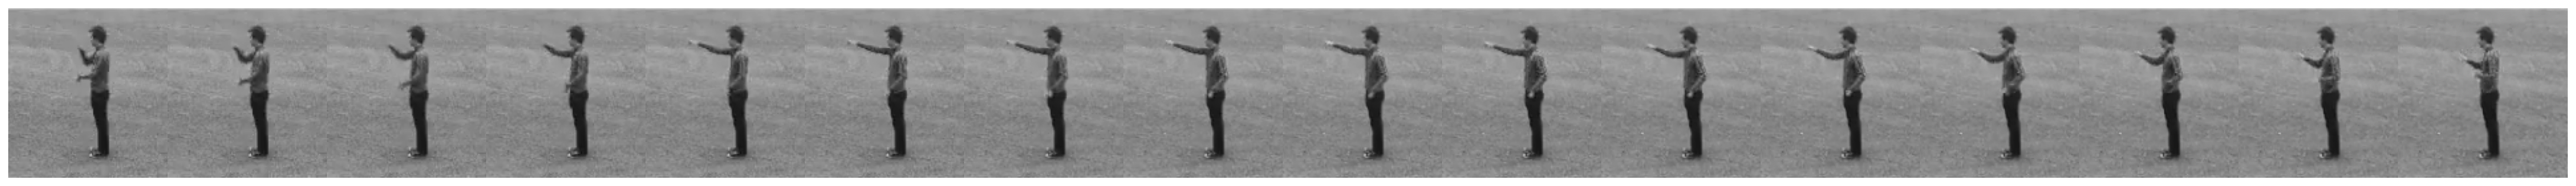

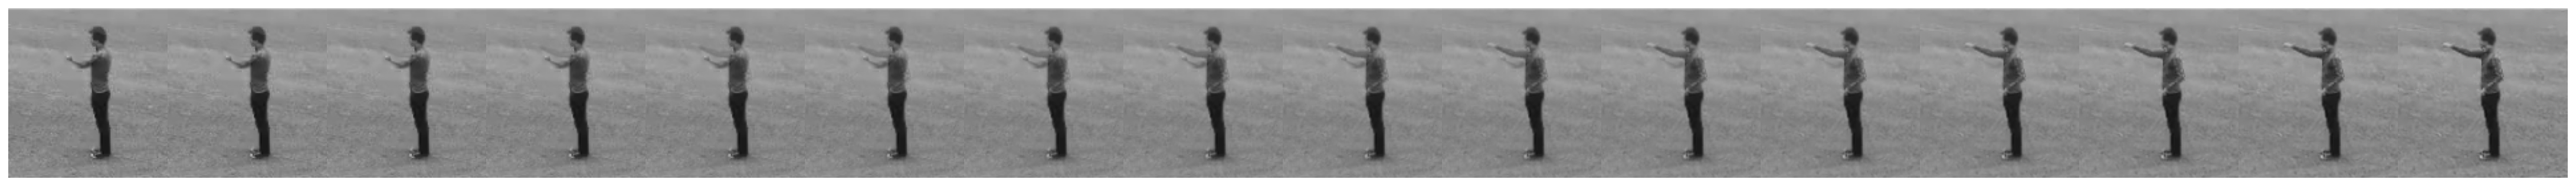

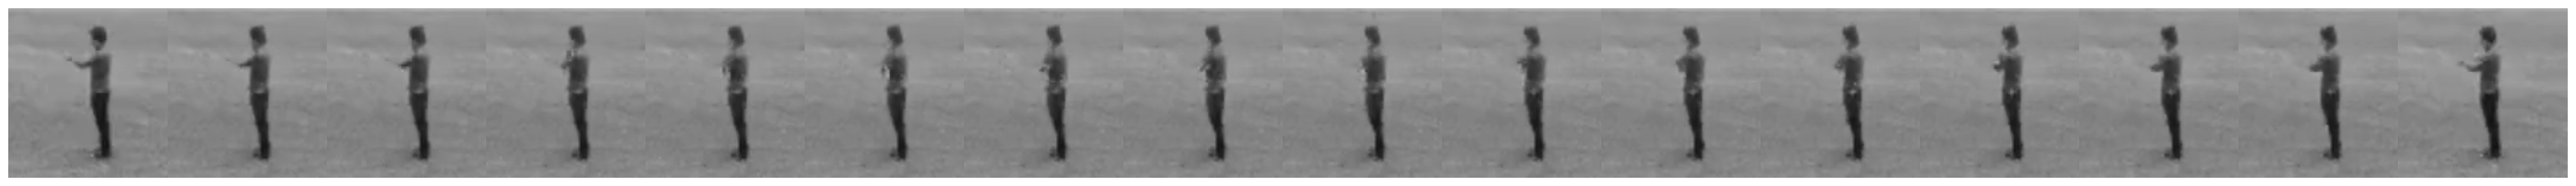

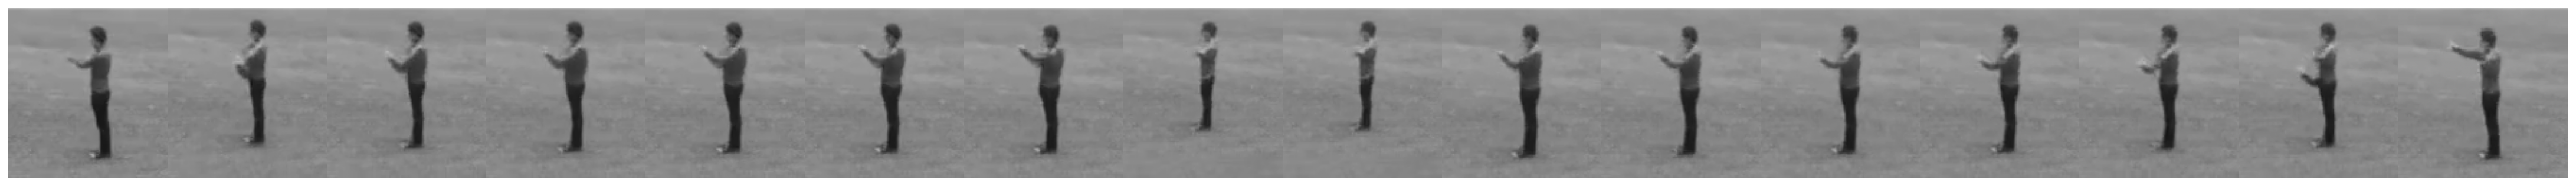

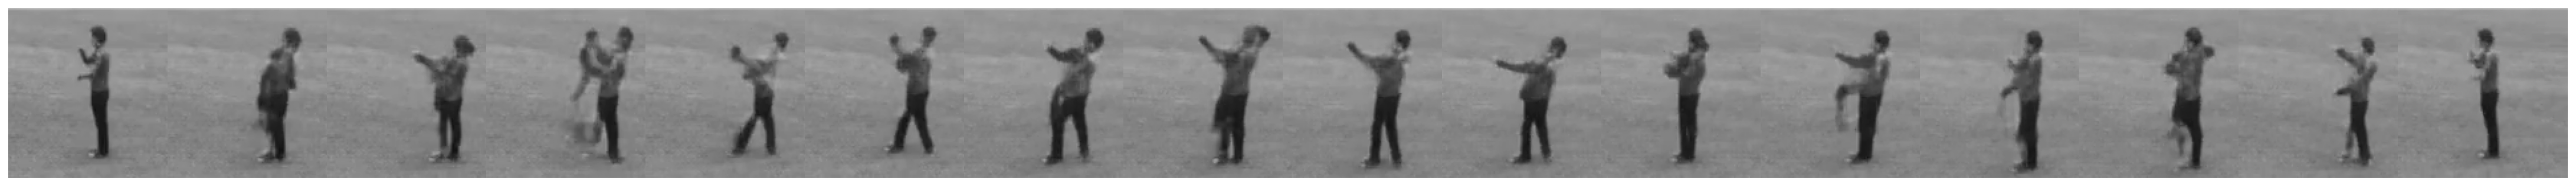

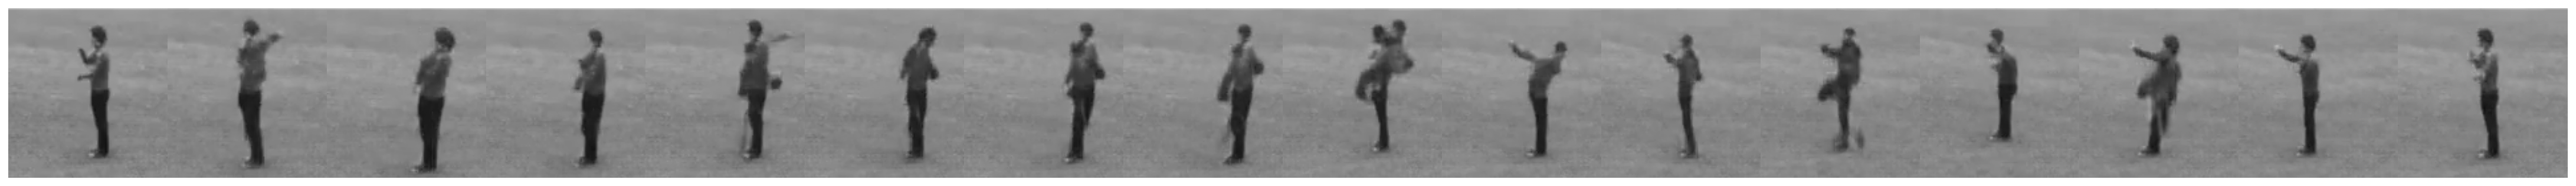

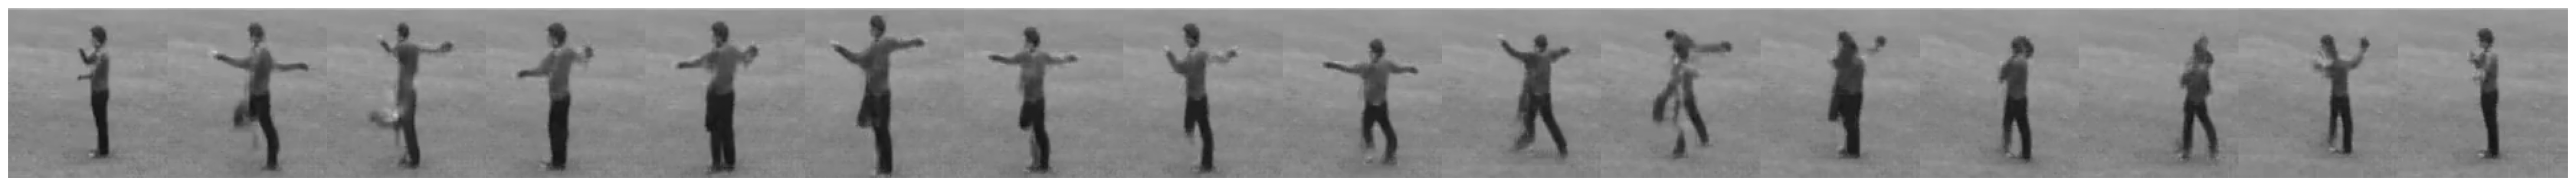

In [170]:
display_video_seq(actual_video, linear_video, convol_video, predict_video, GAN_video_1, GAN_video_2, GAN_video_3)

In [113]:
output_dir = 'test_videos/generated_kth/'
outputfiles = [output_dir + f for f in os.listdir(output_dir)]
outputfiles.sort()
outputfiles

to_save = []
for f in tqdm(outputfiles):
    _, video = read_video(f)
    video = [resize(frame, (64, 64))[..., :3] for frame in video]
    to_save.append(video)
    
pickle.dump(to_save, open("save.p", "wb" ))

100%|██████████| 109/109 [01:13<00:00,  1.47it/s]
